In [1]:
import matplotlib.pyplot as plt
import seaborn
import requests
import json
import pandas as pd


In [2]:
def predict(sentence):
    url = "http://mazajak.inf.ed.ac.uk:8000/api/predict"
    to_sent = {'data': sentence}
    data = json.dumps(to_sent)
    headers = {'content-type': 'application/json'}
    # sending get request and saving the response as response object
    response = requests.post(url=url, data=data, headers=headers)
    
    if response.status_code == 200:
        prediction = json.loads(response.content)['data']
        
    else:
        prediction = "error"

    return prediction

In [3]:
# change the seeting of the cells to show the entire content of coulmn ( eexpand the size of coulmn)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [4]:
df = pd.read_csv('Matcha#DatasetCleaned.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'Matcha#DatasetCleaned.csv'

In [ ]:
df['Class'] = df['Tweet'].apply(lambda x: predict(x))

In [ ]:
df.head(20)

In [23]:
# number of 'positive' tweet rows
countPositive = df['Class'].str.contains('positive', na=False).sum()
print(countPositive)

0


In [24]:
# number of 'Negative' tweet rows
countNegative = df['Class'].str.contains('negative', na=False).sum()
print(countNegative)

0


In [26]:
# number of 'Neutral' tweet rows
countNeutral = df['Class'].str.contains('neutral', na=False).sum()
print(countNeutral)

2836


# Descriptive

# Predictive

## Models preparation

In [5]:
# impor Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB

# Display the tweet fully using:
pd.set_option('display.max_colwidth', None)
pd.set_option('max_colwidth', None)

In [6]:
#choose columns
fields = ['Tweet', 'Sentiment']
#read the two columns from the file and drop the null values
df = pd.read_csv('ClassifiedMatchDS.csv', skipinitialspace=True, usecols=fields).dropna()


In [7]:
#remove neutral rows, they wouldn't help
df=df[df['Sentiment']!='neutral']

In [8]:
#change sentiment values to numeric 
df['Sentiment'] = df['Sentiment'].map({'positive':1, 'negative':0})

In [9]:
#identfy the tweets and the lables
tweets= df['Tweet']
lables= df['Sentiment']

In [10]:
#Convert textual data to numeric form
tf_vec=TfidfVectorizer()
x=tf_vec.fit_transform(tweets)
x.shape


(2194, 4652)

In [11]:

#Training phase
x_train,x_test, y_train, y_test= train_test_split(x, lables, test_size=0.3, random_state=0)

print(x_train.shape,x_test.shape, y_train.shape, y_test.shape)

(1535, 4652) (659, 4652) (1535,) (659,)


## Model#1 [Logistic Regression]

In [12]:
# build the logistic regression classifier
# use the training data to train the estimator
classifier_log = LogisticRegression().fit(x_train,y_train)
print("LogisticRegression accuracy: %.2f" % classifier_log.score(x_test, y_test))


LogisticRegression accuracy: 0.90


In [13]:

#do a 10 fold cross-validation 
results_log = cross_val_score(classifier_log, x.todense(),lables, cv=10)
print("\n10-fold cross-validation:")
print(results_log)


#calcuate the avrage accuracy
print("The average accuracy of the LogisticRegression classifier is : %.2f" % np.mean(results_log))


#print confusion matrix
print("\nConfusion matrix of the LogisticRegression classifier:")
predicted_log = classifier_log.predict(x_test)
print(confusion_matrix(y_test,predicted_log))


#print Classification report
print("\nClassification_report of LogisticRegression classifier:")
print(classification_report(y_test,predicted_log))
print("----------------------------------------------------------------------------")

C:\Users\ghada\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\ghada\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\ghada\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\ghada\anaconda3\lib\site-


10-fold cross-validation:
[0.90909091 0.90909091 0.90909091 0.90909091 0.9086758  0.9086758
 0.9086758  0.9086758  0.9086758  0.9086758 ]
The average accuracy of the LogisticRegression classifier is : 0.91

Confusion matrix of the LogisticRegression classifier:
[[  0  65]
 [  0 594]]

Classification_report of LogisticRegression classifier:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        65
           1       0.90      1.00      0.95       594

    accuracy                           0.90       659
   macro avg       0.45      0.50      0.47       659
weighted avg       0.81      0.90      0.85       659

----------------------------------------------------------------------------


C:\Users\ghada\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\ghada\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\ghada\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\ghada\anaconda3\lib\site-

In [14]:
# calculate the fpr and tpr for all thresholds of the classification

probs = classifier_log.predict_proba(x_test)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

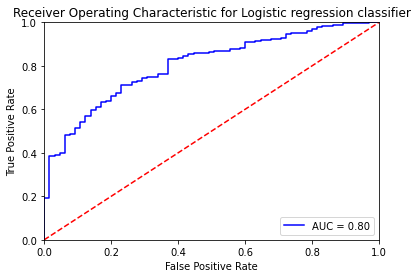

In [15]:
# polt AUC
plt.title('Receiver Operating Characteristic for Logistic regression classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Model#2 [Naïve Bayesian]

In [16]:
# create the classifer and fit the training data and lables
classifier_nb = MultinomialNB().fit(x_train.todense(),y_train)

print("MultinomialNB accuracy: %.2f"%classifier_nb.score(x_test.todense(), y_test))

MultinomialNB accuracy: 0.90


C:\Users\ghada\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\ghada\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [17]:
#do a 10 fold cross-validation 
results_nb = cross_val_score(classifier_nb, x.todense(),lables, cv=10)
print("\n10-fold cross-validation:")
print(results_nb)

#calcuate the avrage accuracy
print("The average accuracy of the MultinomialNB classifier is : %.2f" % np.mean(results_nb))

#print confusion matrix
print("\nConfusion matrix of the MultinomialNB classifier:")
predicted_nb = classifier_nb.predict(x_test.todense())
print(confusion_matrix(y_test,predicted_nb))

#print Classification report
print("\nClassification_report of MultinomialNB classifier:")
print(classification_report(y_test,predicted_nb))
print("----------------------------------------------------------------------------")


C:\Users\ghada\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\ghada\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\ghada\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\ghada\anaconda3\lib\site-


10-fold cross-validation:
[0.90909091 0.90909091 0.90909091 0.90909091 0.9086758  0.9086758
 0.9086758  0.9086758  0.9086758  0.9086758 ]
The average accuracy of the MultinomialNB classifier is : 0.91

Confusion matrix of the MultinomialNB classifier:
[[  0  65]
 [  0 594]]

Classification_report of MultinomialNB classifier:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        65
           1       0.90      1.00      0.95       594

    accuracy                           0.90       659
   macro avg       0.45      0.50      0.47       659
weighted avg       0.81      0.90      0.85       659

----------------------------------------------------------------------------


C:\Users\ghada\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\ghada\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\ghada\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\ghada\anaconda3\lib\site-

In [18]:
# calculate the fpr and tpr for all thresholds of the classification

probs = classifier_nb.predict_proba(x_test)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

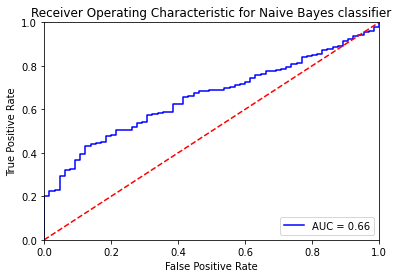

In [19]:
# polt AUC
plt.title('Receiver Operating Characteristic for Naive Bayes classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()